<a href="https://colab.research.google.com/github/Saultr21/IA-Y-BIGDATA/blob/main/M2D/STRIPS/Strips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Explicación del Código: Resolución del Problema de Apilamiento de Bloques

Este código utiliza un enfoque de búsqueda para resolver el problema de mover bloques de un lugar inicial a un lugar objetivo, siguiendo ciertas reglas y condiciones.

---

#### **1. Representación de Estados:**
- **`estado_inicial`**: Representa la disposición inicial de los bloques en tres lugares.
- **`estado_objetivo`**: Representa la disposición deseada de los bloques.

Cada lugar se modela como una lista de bloques, en orden de base a cima.

---

#### **2. Clase Accion:**
Modela las acciones posibles, cada una con:
- `nombre`: Describe el movimiento (e.g., "Mover A de 1 a 2").
- `precondiciones`: Reglas que deben cumplirse para realizar la acción.
- `efectos`: Cambios que ocurren en el estado tras ejecutar la acción.

---

#### **3. Generación de Acciones:**
- `crear_acciones()`: Crea todas las combinaciones posibles de movimientos de bloques entre los tres lugares.

Ejemplo de acción:
- "Mover A de 1 a 2" tiene las precondiciones:
  - El bloque A está en la cima del lugar 1 (`top(1) == 'A'`).
  - El lugar 2 está libre (`libre(2)`).

---

#### **4. Aplicar Acción:**
- `aplicar_accion(estado, accion)`: Simula el efecto de mover un bloque, devolviendo un nuevo estado.
  - Quita el bloque del lugar de origen.
  - Coloca el bloque en el lugar de destino.

---

#### **5. Verificación de Objetivo:**
- `es_objetivo(estado, objetivo)`: Comprueba si el estado actual coincide con el estado objetivo.

---

#### **6. Algoritmo de Búsqueda (BFS):**
- `planificar(estado_inicial, estado_objetivo, acciones)`: Encuentra el plan para alcanzar el estado objetivo desde el inicial.
  - Usa una cola (`frontera`) para explorar los estados.
  - Evita repetir estados ya visitados.
  - Devuelve una lista de acciones que conducen al objetivo o `None` si no hay solución.

---

#### **7. Representación Visual:**
- `representar_estado(estado, paso, accion=None)`: Visualiza los bloques en sus lugares usando Matplotlib.
  - Cada lugar es un contenedor, y los bloques están apilados según el estado.
  - Muestra la acción ejecutada en cada paso.

---

#### **8. Ejecución del Planificador:**
1. Se calcula el plan usando `planificar`.
2. Se muestran los pasos del plan:
   - Estado inicial representado gráficamente.
   - Cada acción del plan se ejecuta, actualizando el estado y mostrando la nueva disposición.

---

#### **Ejemplo de Salida:**
- **Plan encontrado:** Lista de movimientos como:
  - "Mover A de 1 a 2"
  - "Mover B de 1 a 3"
- **Representación gráfica:** Visualiza cómo los bloques se mueven paso a paso hasta alcanzar el estado objetivo.

Si no hay solución, imprime: `"No se encontró un plan."`

---

Este enfoque combina técnicas de planificación, búsqueda y visualización para resolver problemas de forma clara y comprensible.


Plan encontrado:


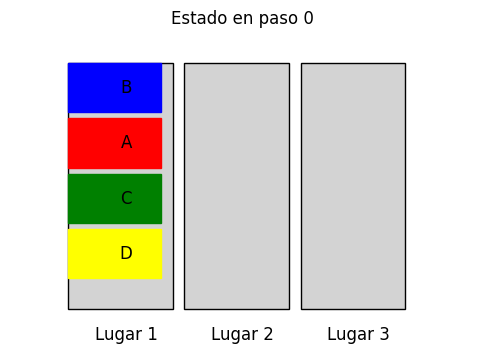

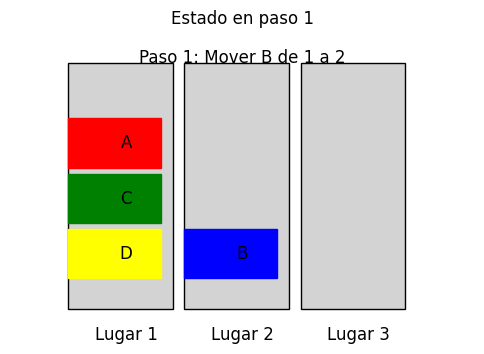

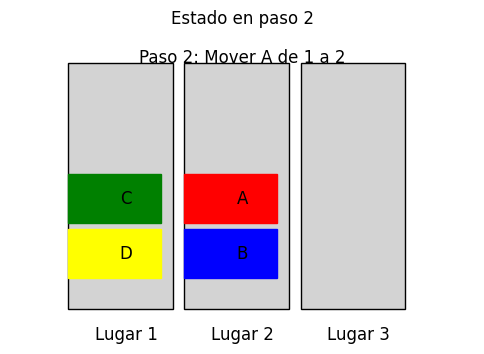

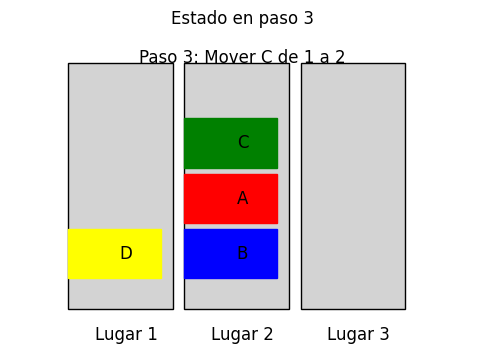

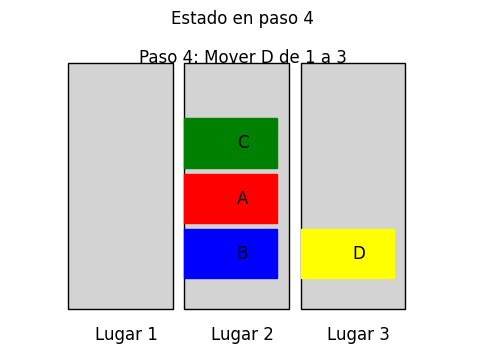

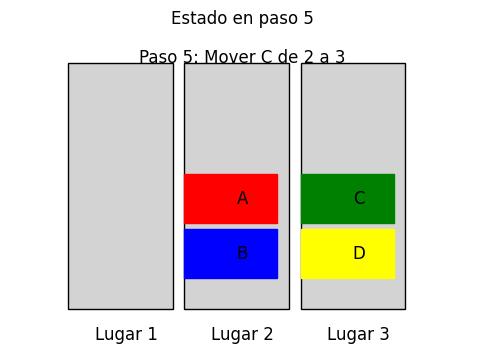

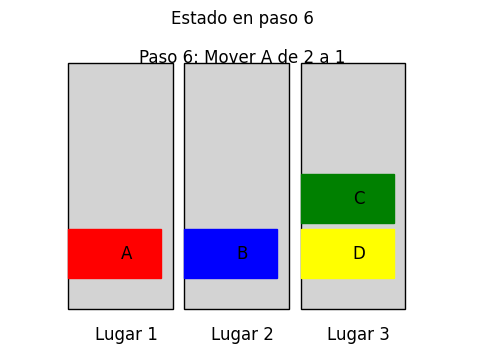

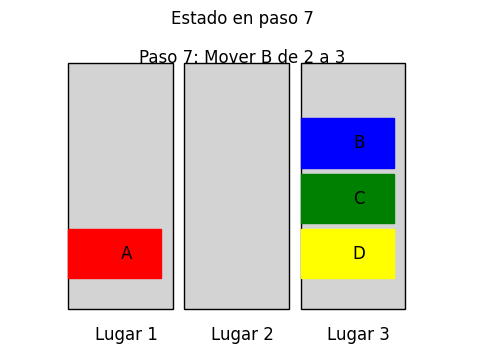

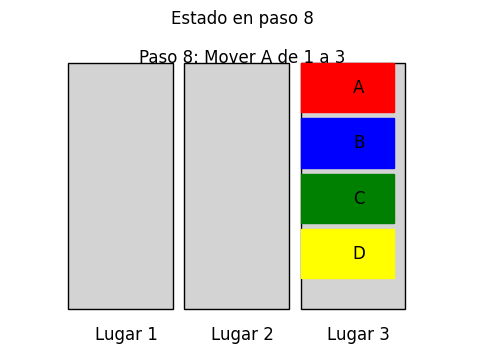

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Estado inicial y estado objetivo, representados como diccionarios
estado_inicial = {
    1: ['D', 'C', 'A', 'B'],  # Lugar 1 con bloques apilados en orden de base a cima
    2: [],                    # Lugar 2 inicialmente vacío
    3: []                     # Lugar 3 inicialmente vacío
}

estado_objetivo = {
    1: [],                     # Lugar 1 vacío en el estado objetivo
    2: [],                     # Lugar 2 vacío en el estado objetivo
    3: ['D', 'C', 'B', 'A']    # Lugar 3 con bloques apilados en orden de base a cima
}

class Accion:
    def __init__(self, nombre, precondiciones, efectos):
        self.nombre = nombre
        self.precondiciones = precondiciones
        self.efectos = efectos

def crear_acciones():
    acciones = []
    for origen in range(1, 4):
        for destino in range(1, 4):
            if origen != destino:
                for bloque in ['A', 'B', 'C', 'D']:
                    nombre = f"Mover {bloque} de {origen} a {destino}"
                    precondiciones = [f"top({origen}) == '{bloque}'", f"libre({destino})"]
                    efectos = [f"libre({origen})", f"top({destino}) = '{bloque}'", f"no_top({origen})"]
                    acciones.append(Accion(nombre, precondiciones, efectos))
    return acciones

acciones = crear_acciones()

def aplicar_accion(estado, accion):
    nuevo_estado = {lugar: pila.copy() for lugar, pila in estado.items()}
    bloque = accion.nombre.split()[1]
    origen = int(accion.nombre.split()[3])
    destino = int(accion.nombre.split()[5])

    if nuevo_estado[origen] and nuevo_estado[origen][-1] == bloque and (not nuevo_estado[destino] or destino != origen):
        nuevo_estado[origen].pop()
        nuevo_estado[destino].append(bloque)

    return nuevo_estado

def es_objetivo(estado, objetivo):
    return estado == objetivo

def planificar(estado_inicial, estado_objetivo, acciones):
    frontera = deque([(estado_inicial, [])])
    visitados = set()

    while frontera:
        estado, plan = frontera.popleft()

        if es_objetivo(estado, estado_objetivo):
            return plan

        estado_tupla = tuple(tuple(pila) for pila in estado.values())
        if estado_tupla in visitados:
            continue
        visitados.add(estado_tupla)

        for accion in acciones:
            nuevo_estado = aplicar_accion(estado, accion)
            nuevo_plan = plan + [accion.nombre]
            frontera.append((nuevo_estado, nuevo_plan))

    return None

def representar_estado(estado, paso, accion=None):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 5)

    # Colores y posiciones para cada lugar (1, 2, 3)
    lugares = {1: (1, 1), 2: (2, 1), 3: (3, 1)}
    bloque_color = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'yellow'}

    # Dibujar los lugares con mayor altura para que quepan los bloques
    for lugar, (x, y) in lugares.items():
        ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 0.9, 4, edgecolor='black', facecolor='lightgray'))  # Altura aumentada
        ax.text(x, y-1, f"Lugar {lugar}", ha='center', fontsize=12, color='black')

    # Dibujar los bloques
    for lugar, pila in estado.items():
        for i, bloque in enumerate(pila):
            # Ajustar la posición X para centrar los bloques dentro de los lugares
            ax.add_patch(plt.Rectangle((lugares[lugar][0]-0.5, lugares[lugar][1] + i * 0.9), 0.8, 0.8, color=bloque_color[bloque]))
            ax.text(lugares[lugar][0], lugares[lugar][1] + i * 0.9 + 0.4, bloque, ha='center', va='center', fontsize=12, color='black')

    # Mostrar la acción de este paso (si la hay)
    if accion:
        ax.text(2, 4.5, f"Paso {paso}: {accion}", ha='center', fontsize=12, color='black')

    plt.title(f"Estado en paso {paso}")
    plt.axis('off')
    plt.show()

# Ejecutar el planificador y obtener el plan para alcanzar el objetivo
plan = planificar(estado_inicial, estado_objetivo, acciones)

# Mostrar el plan encontrado y los pasos iniciales
if plan:
    print("Plan encontrado:")

    # Representar el paso inicial antes de empezar
    representar_estado(estado_inicial, 0)

    for paso, accion in enumerate(plan, start=1):

        # Buscar la acción correspondiente en la lista de acciones
        accion_objetivo = next(a for a in acciones if a.nombre == accion)

        # Aplicar la acción y representar el nuevo estado
        estado_inicial = aplicar_accion(estado_inicial, accion_objetivo)
        representar_estado(estado_inicial, paso, accion)
else:
    print("No se encontró un plan.")


In [ ]:
import numpy as np

# Definimos la matriz inicial (3x4) y marcamos las celdas ocupadas
matriz = np.zeros((4, 3), dtype=int)  # Cambiamos a 4x3
bloques = [4, 7, 9, 10, 11, 12]
for bloque in bloques:
    fila = (bloque - 1) // 3
    columna = (bloque - 1) % 3
    matriz[fila, columna] = 1

# Objetivo: mover el bloque de la celda 4 a la celda 6
inicio = (4 - 1) // 3, (4 - 1) % 3  # Fila y columna de la celda 4
destino = (6 - 1) // 3, (6 - 1) % 3  # Fila y columna de la celda 6

# Función para mostrar el estado de la matriz
def mostrar_matriz(matriz):
    for fila in matriz:
        print(" ".join(map(str, fila)))
    print()

# Función para mover un bloque
def mover_bloque(matriz, origen, destino):
    pasos = []
    actual = origen

    while actual != destino:
        fila_actual, col_actual = actual

        # Determinar el próximo movimiento
        if fila_actual < destino[0]:  # Mover hacia abajo
            siguiente = (fila_actual + 1, col_actual)
        elif fila_actual > destino[0]:  # Mover hacia arriba
            siguiente = (fila_actual - 1, col_actual)
        elif col_actual < destino[1]:  # Mover hacia la derecha
            siguiente = (fila_actual, col_actual + 1)
        elif col_actual > destino[1]:  # Mover hacia la izquierda
            siguiente = (fila_actual, col_actual - 1)
        else:
            break

        # Realizar el movimiento
        pasos.append((actual, siguiente))
        matriz[siguiente] = matriz[actual]
        matriz[actual] = 0
        actual = siguiente

    return pasos

# Mostrar el estado inicial
print("Estado inicial:")
mostrar_matriz(matriz)

# Realizar el movimiento
pasos_realizados = mover_bloque(matriz, inicio, destino)

# Mostrar el estado final
print("Estado final:")
mostrar_matriz(matriz)

# Mostrar los pasos realizados
print("Pasos realizados:")
for paso in pasos_realizados:
    print(f"Mover de celda {paso[0]} a celda {paso[1]}")


Estado inicial:
0 0 0
1 0 0
1 0 1
1 1 1

Estado final:
0 0 0
0 0 0
0 1 1
1 1 1

Pasos realizados:
Mover de celda (1, 0) a celda (2, 0)
Mover de celda (2, 0) a celda (2, 1)
